In [3293]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## The last 50 instences in iris data is one type "Virginica" and also The first 50 instences is "setosa"

In [3294]:
iris = sns.load_dataset("iris") 
iris = iris.tail(50)
np.unique(iris["species"])

array(['virginica'], dtype=object)

In [3295]:
def load_data(cols):
    iris = sns.load_dataset("iris") 
    iris = iris.head(100)
    le = preprocessing.LabelEncoder()
    y = le.fit_transform(iris["species"])
 
    X = iris.drop(["species"], axis=1)
 
    if len(cols) > 0:
        X = X[cols]
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

    return X.values, y

## $h(x)=\beta^{T} X+b$

In [3296]:
def HyperPlane( X,beta,b):
    return X.dot(beta) + b

In [3297]:
def plot_decision_boundary(Support_vectors,beta,b):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired, alpha=1)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
 
        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = HyperPlane(xy,beta,b).reshape(XX.shape)
 
        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors=['black', 'r', 'black'], levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])
 
        # highlight the support vectors
        ax.scatter(X[:, 0][Support_vectors], X[:, 1][Support_vectors], s=100,linewidth=1, edgecolors='k')
 
        plt.show()

# Cost Function or Loss Function (Hinge Loss) with soft Margin

## $Loss=\frac{\beta^{T}\beta}{2}+ C\sum{\epsilon_{i}}$

## Slack Variable : $\epsilon_{i} =max(0,1-y_{i}(\beta^{T}X_{i}+b))$

**Depend on** 

## $y_{i}(\beta^{T}X_{i}+b)>=1-\epsilon_{i}$

### $\epsilon=0$then the corresponding point $\epsilon$ is on the margin or further away

### $0<\epsilon<1$then the corresponding point $\epsilon$ is within the margin and classified correctly (Correct side of the hyperplane).


### $\epsilon>=1$then the corresponding point $\epsilon$  is misclassified and present at the wrong side of the hyperplane.


## Hyper Parameter C 

**if C $\rightarrow$ 0  then the loss is zero and we are trying to maximize the margin.**

**if C $\rightarrow$ $\infty$ then the margin does not have any effect and the objective function tries to just minimize the loss.**

In [3298]:
def CostFunction( margin,beta,C):
    return (1 / 2) * beta.dot(beta) + C * np.sum(np.maximum(0, 1 - margin))


## $Margin=y_{i}(\beta^{T}X_{i}+b)$
**Where $y_{i}(\beta^{T}X_{i}+b) \geqslant 1$ in Canonical HyperPlane  or in general $y_{i}(\beta^{T}X_{i}+b)\geqslant margin$**

In [3299]:
def Margin(X, y,beta,b):
    return y * HyperPlane( X,beta,b)

## $Loss=\frac{\beta^{T}\beta}{2}+ C\sum{\epsilon_{i}}$

## $\frac{\partial Loss}{\partial \beta} =\beta -C\sum{y_{i}x_{i}}$ 

## $\frac{\partial Loss}{\partial b} = -C\sum{y_{i}}$ 

## $\beta=\beta-\lambda \frac{\partial Loss}{\partial \beta} $
## $b=b-\lambda \frac{\partial Loss}{\partial b} $

In [3300]:
def gradientDescent(X,y,margin,beta,b,C,lr):
    misclassified_pts_idx = np.where(margin < 1)[0]
    d_beta = beta - C * y[misclassified_pts_idx].dot(X[misclassified_pts_idx])
    beta = beta - lr * d_beta

    d_b = - C * np.sum(y[misclassified_pts_idx])
    b = b - lr * d_b

    return beta , b

In [3301]:
def fit( X, y,C, lr=1e-3, epochs=1000):
        beta = np.random.randn(X.shape[1])
        b = 0
        loss_array = []
        for i in range(epochs):
            margin = Margin(X, y,beta,b)
            loss = CostFunction(margin,beta,C)
            loss_array.append(loss)
            beta,b=gradientDescent(X,y,margin,beta,b,C,lr)

        Support_vectors = np.where(Margin(X, y,beta,b) <=1)[0]
        print(Support_vectors)
        return Support_vectors ,beta,b


In [3302]:
def predict(  X,beta,b):
    return np.sign(HyperPlane( X,beta,b))
 

In [3303]:
def score( y,y_p):
    
    return np.mean(y == y_p)

[57 93]
Train score: 1.0


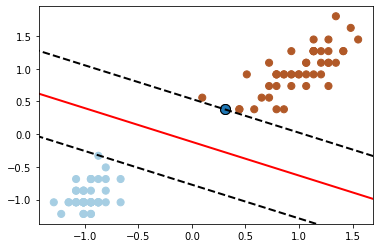

In [3304]:
cols = ["petal_length", "petal_width"]
X,y = load_data(cols)
y[y == 0] = -1
# # scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
# now we'll use our custom implementation
Support_vectors,beta,b =fit(X,y,15)
y_p=predict(X,beta,b)
print("Train score:",score(y,y_p))

plot_decision_boundary(Support_vectors,beta,b)